In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
#size of the dataset
data.shape 

(8760, 14)

In [4]:
data.isnull().sum()/len(data)*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [5]:
data.drop('Date', axis=1, inplace=True)
data = pd.get_dummies(data)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1


In [6]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError

In [11]:
input_layers = X_train.shape[1]
neurons_hidden_layer1 = 160
neurons_hidden_layer2 = 480
neurons_hidden_layer3 = 256
output_layers = 1
learning_rate = 0.01

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(input_layers, )))
model.add(Dense(units=neurons_hidden_layer1, activation='relu'))
model.add(Dense(units=neurons_hidden_layer2, activation='relu'))
model.add(Dense(units=neurons_hidden_layer3, activation='relu'))
model.add(Dense(units=output_layers, activation='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               2880      
_________________________________________________________________
dense_1 (Dense)              (None, 480)               77280     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               123136    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 203,553
Trainable params: 203,553
Non-trainable params: 0
_________________________________________________________________


In [14]:
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate), metrics=[msle])

In [15]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
219/219 [==============================] - 2s 7ms/step - loss: 0.9684 - mean_squared_logarithmic_error: 0.9684 - val_loss: 0.4419 - val_mean_squared_logarithmic_error: 0.4432
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 0.4247 - mean_squared_logarithmic_error: 0.4247 - val_loss: 0.4232 - val_mean_squared_logarithmic_error: 0.4243
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 0.3873 - mean_squared_logarithmic_error: 0.3873 - val_loss: 0.4072 - val_mean_squared_logarithmic_error: 0.4071
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 0.3584 - mean_squared_logarithmic_error: 0.3584 - val_loss: 0.3524 - val_mean_squared_logarithmic_error: 0.3532
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 0.3136 - mean_squared_logarithmic_error: 0.3136 - val_loss: 0.3317 - val_mean_squared_logarithmic_error: 0.3327
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - lo

219/219 [==============================] - 1s 4ms/step - loss: 0.1310 - mean_squared_logarithmic_error: 0.1310 - val_loss: 0.1933 - val_mean_squared_logarithmic_error: 0.1946
Epoch 45/50
219/219 [==============================] - 1s 4ms/step - loss: 0.1282 - mean_squared_logarithmic_error: 0.1282 - val_loss: 0.2054 - val_mean_squared_logarithmic_error: 0.2058
Epoch 46/50
219/219 [==============================] - 1s 4ms/step - loss: 0.1198 - mean_squared_logarithmic_error: 0.1198 - val_loss: 0.2296 - val_mean_squared_logarithmic_error: 0.2298
Epoch 47/50
219/219 [==============================] - 1s 5ms/step - loss: 0.1273 - mean_squared_logarithmic_error: 0.1273 - val_loss: 0.2103 - val_mean_squared_logarithmic_error: 0.2109
Epoch 48/50
219/219 [==============================] - 1s 5ms/step - loss: 0.1224 - mean_squared_logarithmic_error: 0.1224 - val_loss: 0.1942 - val_mean_squared_logarithmic_error: 0.1945
Epoch 49/50
219/219 [==============================] - 1s 5ms/step - loss: 0.

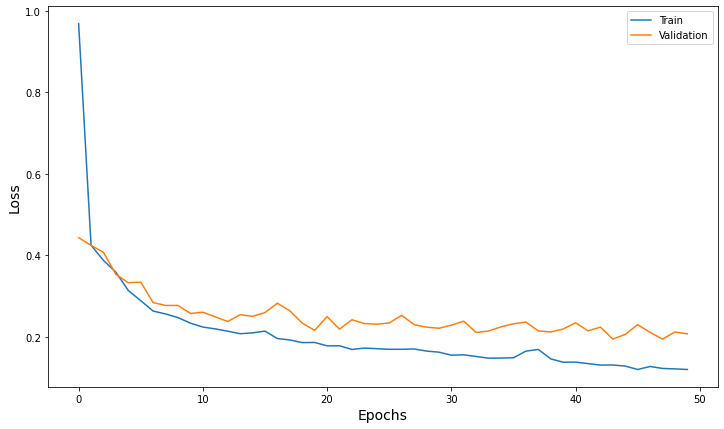

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history['mean_squared_logarithmic_error'], label='Train')
plt.plot(model_history.history['val_mean_squared_logarithmic_error'], label='Validation')
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()